In [53]:
import astropy.io.fits as pf
import pylab as mplot
import healpy as hp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
velocity = np.loadtxt("phase_space_zmin0.1_zmax0.2_withlam_withz.dat")
cluster = pf.open('redmapper_dr8_public_v5.10_catalog_withdr13speczcentral_pcen0.7.fits')[1].data
spec = pf.open('specObj-dr13.fits')[1].data

In [35]:
# print(pf.open('specObj-dr13.fits')[1].header)
print(pf.open('redmapper_dr8_public_v5.10_catalog_withdr13speczcentral_pcen0.7.fits')[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  396 / length of dimension 1                          NAXIS2  =                26350 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   23 / number of table fields                         TTYPE1  = 'ID      '                                                            TFORM1  = 'J       '                                                            TTYPE2  = 'NAME    '                                                            TFORM2  = '20A     '                                                            TTYPE3  = 'RA      '                    

In [84]:
print(len(np.unique(velocity[:,4])))
# there are totoal 1307 clusters around which galaxies are measured
# it seems to be more than a footprint issue, partly is just spec selection I think

1307


In [85]:
z_clust = cluster['z_lambda']
lamb_clust = cluster['lambda']
pcen_clust = cluster['p_cen']
print(len(z_clust[(z_clust>0.1)*(z_clust<0.2)*(lamb_clust>20)*(lamb_clust<100)*(pcen_clust[:,0]>0.8)]))
mask = (z_clust>0.1)*(z_clust<0.2)*(lamb_clust>20)*(lamb_clust<100)*(pcen_clust[:,0]>0.8)
# ok there's more clusters in RM than in the spec match

1556


In [86]:
N = len(spec)
ids = np.arange(N)
np.random.shuffle(ids)

(-20, 90)

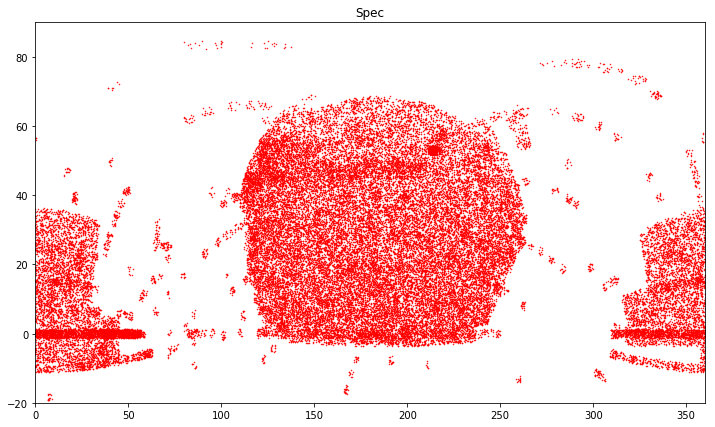

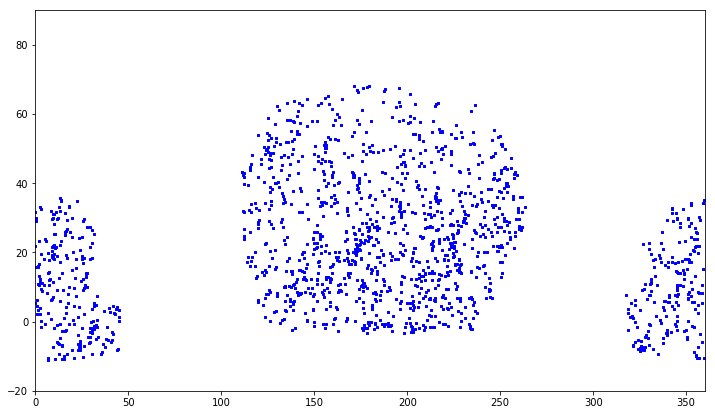

In [87]:
mplot.figure(figsize=(12,7))
mplot.scatter(spec['plug_ra'][ids[:50000]], spec['plug_dec'][ids[:50000]], s=1, c='r', marker='.')
mplot.xlim(0,360)
mplot.ylim(-20,90)
mplot.title('Spec')
mplot.figure(figsize=(12,7))
mplot.scatter(cluster['ra'][mask], cluster['dec'][mask], s=3, c='b', marker='s')
mplot.xlim(0,360)
mplot.ylim(-20,90)

In [78]:
# build a mask to remove the RM clusters that don't have spec matches
# joint that mask with the RM mask
# apply the joint mask to spec
# need to make some cut on spec sample to make it complete?
# then redo the velocity dispersion measurement and use the same sample for 
# density splashback (or just photometric galaxies? morphology_dr8.fits is i<21, let's try that)

In [88]:
nside = 512
mask_spec = np.zeros(hp.nside2npix(nside))

In [89]:
ra_spec = spec['plug_ra']
dec_spec = spec['plug_dec']
theta_spec = (90.-dec_spec)/180*np.pi
phi_spec = ra_spec/180*np.pi
pix_spec = hp.ang2pix(nside, theta_spec, phi_spec)

In [90]:
mask_spec[pix_spec] = 1

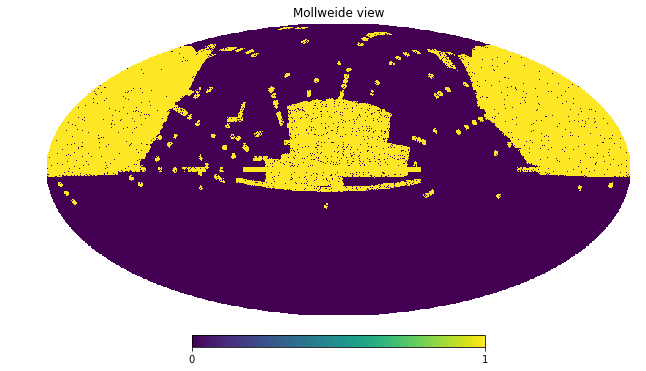

In [91]:
hp.mollview(mask_spec)

In [92]:
ra_clust = cluster['ra'][mask]
dec_clust = cluster['dec'][mask]
theta_clust = (90.-dec_clust)/180*np.pi
phi_clust = ra_clust/180*np.pi
pix_clust = hp.ang2pix(nside, theta_clust, phi_clust)
len(ra_clust[mask_spec[pix_clust] == 1])

1533

In [95]:
# so there's 1533-1307 clusters (20%!) that do not have spec matches, we are ignoring this for now!
# later we could try just measuing density with the spec data